<a href="https://colab.research.google.com/github/RJ-Stony/A-Complete-Guide-to-TM/blob/main/03)Count_based_Document_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate BOW-based Count Vector

### Main Function of movie_reviews
- fileids( )
    - Returns the id(fileid) of movie review documents. 
    - If you use a <strong>'categories'</strong> parameter, you can get only the ids of documents belonging to a specific category.
- categories( )
    - Shows the classification, or label, of review documents.
    - Here, it has positive('pos') and negative('neg') values ​​expressing emotion.
- raw( )
    - Returns the original text of the review document in the form of a list of strings.
    - If <strong>'fileid'</strong> is given as an argument, only specific documents can be retrieved.
- sents( )
    - Returns the result of tokenizing sentences tokenized with <strong>'sent_tokenize'</strong> of NLTK with <strong>'word_tokenize'</strong> for the original text of the review document.
    - By giving <strong>'fileid'</strong> as an argument, you can get the tokenization result for a specific document.
- words( )
    - Returns the result of tokenization with <strong>'word_tokenize'</strong> of NLTK for the original text of the review document.
    - By giving <strong>'fileid'</strong> as an argument, you can get the tokenization result for a specific document.

In [3]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

from nltk.corpus import movie_reviews

print('# review count:', len(movie_reviews.fileids()))    # Returns the id of the movie review document
print('# samples of file ids:', movie_reviews.fileids()[:10])   # Print up to 10 ids

fileid = movie_reviews.fileids()[0]     # Returns the id of the first document
print('# id of the first review:', fileid)

# Print the content of the first document up to 200 characters
print('# first review content:\n', movie_reviews.raw(fileid)[:200])

# Among the results of sentence tokenizing the first document, the first two sentences
print('# sentence tokenization result:', movie_reviews.sents(fileid)[:2])

# The first 20 words of the result of word tokenizing the first document
print('# word tokenization result:', movie_reviews.words(fileid)[:20])

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# review count: 2000
# samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
# id of the first review: neg/cv000_29416.txt
# first review content:
 plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w
# sentence tokenization result: [['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
# word tokenization result: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']


In [4]:
documents = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
print(documents[0][:50])    # Print the first 50 words of the first document.

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']


In [5]:
word_count = {}
for text in documents:
  for word in text:
    word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)
for word in sorted_features[:10]:
  print(f"count of '{word}': {word_count[word]}", end=', ')

count of ',': 77717, count of 'the': 76529, count of '.': 65876, count of 'a': 38106, count of 'and': 35576, count of 'of': 34123, count of 'to': 31937, count of ''': 30585, count of 'is': 25195, count of 'in': 21822, 

In [7]:
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords     # Words that are not normally analyzed

tokenizer = RegexpTokenizer("[\w']{3,}")    # Define tokenizer with regular expression
english_stops = set(stopwords.words('english'))   # Take English Stopwords.

# Get the original text with raw() instead of words()
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# Simultaneous application of stopwords and tokenization.
tokens = [[token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents]
word_count = {}
for text in tokens:
  for word in text:
    word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)

print('Num of features:', len(sorted_features))
for word in sorted_features[:10]:
  print(f"count of '{word}': {word_count[word]}", end=', ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Num of features: 43030
count of 'film': 8935, count of 'one': 5791, count of 'movie': 5538, count of 'like': 3690, count of 'even': 2564, count of 'time': 2409, count of 'good': 2407, count of 'story': 2136, count of 'would': 2084, count of 'much': 2049, 

In [8]:
# Configure features by extracting only the top 1000 words with high frequency.
word_features = sorted_features[:1000]

In [9]:
# A function that transforms a given document into a feature, using word_features
def document_features(document, word_features):
  word_count = {}
  for word in document:   # First, count the frequencies of the words in the document.
    word_count[word] = word_count.get(word, 0) + 1

  features = []
  # Add counted frequencies for words in word_features to features.
  for word in word_features:
    features.append(word_count.get(word, 0))    # Enter 0 for words with no frequency.
  return features

word_features_ex = ['one', 'two', 'teen', 'couples', 'solo']
doc_ex = ['one', 'two', 'teen', 'teen', 'solo']
print(document_features(doc_ex, word_features_ex))

[1, 1, 2, 0, 1]


In [10]:
feature_sets = [document_features(d, word_features) for d in tokens]

# Print the contents of the first feature set with only the first 20 words in word_featres.
for i in range(20):
  print(f'({word_features[i]}, {feature_sets[0][i]})', end=', ')

(film, 5), (one, 3), (movie, 6), (like, 3), (even, 3), (time, 0), (good, 2), (story, 0), (would, 1), (much, 0), (also, 1), (get, 3), (character, 1), (two, 2), (well, 1), (first, 0), (characters, 1), (see, 2), (way, 3), (make, 5), 

In [11]:
print(feature_sets[0][-20:])    # Print only the last 20 of the feature set.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Generate Count Vectors with Scikit-Learn

### Main Parameter of CountVectorizer( )
- tokenizer
    - Specifies the external tokenizer in the form of a function.
    - If not specified, its own tokenizer is used.
- stop_words
    - Specifies the stopword dictionary in the form of a list.
    - If you give a value as <strong>'english'</strong>, its own English stopword dictionary is used.
- ngram_range
    - Specifies the range of ngram in the form of a tuple of (min_n, max_n).
    - The default is (1, 1).
- max_df
    - When composing a feature with a word, if the frequency(document frequency) of occurrence in the document is greater than max_df, it is excluded.
    - It can be specified as a percentage or the number of documents.
- min_df
    - When composing a feature with a word, if the frequency(document frequency) of occurrence in the document is less than min_df, it is excluded.
    - It can be specified as a percentage or the number of documents.
- max_features
    - Specifies the maximum number of features.
    - If not specified, the entire word is used.
- vocabulay
    - Directly specify the words to use as attributes.
- binary
    - If a value of True is given, the feature value is generated based on the presence or absence(1 or 0) of the word learned in verse 1 instead of the frequency.

### Main Method of CountVectorizer class
- fit(raw_documents)
    - Tokenizes the set of documents(raw_documents) given as arguments and creates a set of properties.
- transform(raw_docments)
    - Using the feature set created by fit( ), it is converted into a count vector for the document set(raw_docments) given as an argument and returned.
- fit_transform(raw_documents)
    - Fit and transform are performed simultaneously on the set of documents given as arguments.
- get_feature_names_out( )
    - Returns the names of the attributes in the attribute set, i.e. words, in order.
    - Before the version of Sklearn was changed to 1.0, it was get_feature_names(), so check the version of sklearn and use it accordingly.

In [12]:
# Prepare data, extract raw text using movie_reviews.raw()
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer()     # When using default values ​​for all parameters

# If you specify a set of features with the word_features you created earlier.
cv = CountVectorizer(vocabulary=word_features)

# When you specify the maximum number of attributes without specifying a set of attributes.
# cv = CountVectorizer(max_features=1000)

print(cv)     # Check the object's argument

CountVectorizer(vocabulary=['film', 'one', 'movie', 'like', 'even', 'time',
                            'good', 'story', 'would', 'much', 'also', 'get',
                            'character', 'two', 'well', 'first', 'characters',
                            'see', 'way', 'make', 'life', 'really', 'films',
                            'plot', 'little', 'people', 'could', 'bad', 'scene',
                            'never', ...])


In [14]:
reviews_cv = cv.fit_transform(reviews)  # Learn and transform a count vector using reviews
print(cv.get_feature_names_out()[:20])  # Returns the feature name used in the count vector
print(word_features[:20])               # Print for comparison

['film' 'one' 'movie' 'like' 'even' 'time' 'good' 'story' 'would' 'much'
 'also' 'get' 'character' 'two' 'well' 'first' 'characters' 'see' 'way'
 'make']
['film', 'one', 'movie', 'like', 'even', 'time', 'good', 'story', 'would', 'much', 'also', 'get', 'character', 'two', 'well', 'first', 'characters', 'see', 'way', 'make']


In [15]:
print('# type of count vectors:', type(reviews_cv))
print('# shape of count vectors:', reviews_cv.shape)
print('# sample of count vector:')
print(reviews_cv[0, :10])

# type of count vectors: <class 'scipy.sparse.csr.csr_matrix'>
# shape of count vectors: (2000, 1000)
# sample of count vector:
  (0, 0)	6
  (0, 1)	3
  (0, 2)	6
  (0, 3)	3
  (0, 4)	3
  (0, 6)	2
  (0, 8)	1


In [16]:
reviews_cv

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 252984 stored elements in Compressed Sparse Row format>

In [17]:
print(feature_sets[0][:20])   # Count Vector computed directly before

# Print the first 20 among the first feature set of the transformed result.
print(reviews_cv.toarray()[0, :20])

[5, 3, 6, 3, 3, 0, 2, 0, 1, 0, 1, 3, 1, 2, 1, 0, 1, 2, 3, 5]
[6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]


In [21]:
for word, count in zip(cv.get_feature_names_out()[:20], reviews_cv[0].toarray()[0, :20]):
  print(f'{word}:{count}', end=', ')

film:6, one:3, movie:6, like:3, even:3, time:0, good:2, story:0, would:1, much:0, also:1, get:3, character:2, two:2, well:1, first:0, characters:1, see:2, way:3, make:5, 

## Count vector conversion of Korean text

In [22]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/wikibook/textmining/main/data/daum_movie_review.csv')
df.head(10)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워
5,나는 재밌게 봄,10,2018.10.14,인피니티 워
6,0.5점은 줄 수 없냐?,0,2018.10.10,인피니티 워
7,헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...,10,2018.10.08,인피니티 워
8,충격 결말,9,2018.10.06,인피니티 워
9,응집력,8,2018.10.05,인피니티 워


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
daum_cv = CountVectorizer(max_features=1000)

# Learn and transform a count vector using review.
daum_DTM = daum_cv.fit_transform(df.review)

print(daum_cv.get_feature_names_out()[:100])  # Returns the feature name used in the count vector.

['10점' '18' '1987' '1도' '1점' '1점도' '2시간' '2시간이' '2편' '5점' '6점' '7점' '8점'
 'cg' 'cg가' 'cg는' 'cg도' 'cg만' 'good' 'of' 'ㅋㅋ' 'ㅋㅋㅋ' 'ㅋㅋㅋㅋ' 'ㅎㅎ' 'ㅎㅎㅎ'
 'ㅜㅜ' 'ㅠㅠ' 'ㅠㅠㅠ' 'ㅡㅡ' '가는' '가는줄' '가면' '가서' '가슴' '가슴아픈' '가슴이' '가장' '가족'
 '가족과' '가족들과' '가족의' '가족이' '가지고' '간만에' '갈수록' '감독' '감독님' '감독은' '감독의' '감독이'
 '감동' '감동과' '감동도' '감동은' '감동을' '감동이' '감동입니다' '감동적' '감동적이고' '감동적인' '감사드립니다'
 '감사합니다' '감정이' '갑자기' '갔는데' '갔다가' '강철비' '강추' '강추합니다' '같고' '같네요' '같다' '같습니다'
 '같아' '같아요' '같은' '같은데' '같음' '같이' '개연성' '개연성이' '개인적으로' '거의' '겁나' '것도' '것은'
 '것을' '것이' '것이다' '겨울왕국' '결국' '결말' '결말이' '계속' '고맙습니다' '곤지암' '공포' '공포를'
 '공포영화' '관객']


In [25]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 86.4 MB/s 


In [26]:
from konlpy.tag import Okt
twitter_tag = Okt()
print('# 전체 형태소 결과:', twitter_tag.morphs(df.review[1]))
print('# 명사만 추출:', twitter_tag.nouns(df.review[1]))
print('# 품사 태깅 결과:', twitter_tag.pos(df.review[1]))

# 전체 형태소 결과: ['몰입', '할수밖에', '없다', '.', '어렵게', '생각', '할', '필요없다', '.', '내', '가', '전투', '에', '참여', '한', '듯', '손', '에', '땀', '이남', '.']
# 명사만 추출: ['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']
# 품사 태깅 결과: [('몰입', 'Noun'), ('할수밖에', 'Verb'), ('없다', 'Adjective'), ('.', 'Punctuation'), ('어렵게', 'Adjective'), ('생각', 'Noun'), ('할', 'Verb'), ('필요없다', 'Adjective'), ('.', 'Punctuation'), ('내', 'Noun'), ('가', 'Josa'), ('전투', 'Noun'), ('에', 'Josa'), ('참여', 'Noun'), ('한', 'Determiner'), ('듯', 'Noun'), ('손', 'Noun'), ('에', 'Josa'), ('땀', 'Noun'), ('이남', 'Noun'), ('.', 'Punctuation')]


In [27]:
def my_tokenizer(doc):
  return [
      token
      for token, pos in twitter_tag.pos(doc)
      if pos in ['Noun', 'Verb', 'Adjective']
  ]

print("나만의 토크나이저 결과:", my_tokenizer(df.review[1]))

나만의 토크나이저 결과: ['몰입', '할수밖에', '없다', '어렵게', '생각', '할', '필요없다', '내', '전투', '참여', '듯', '손', '땀', '이남']


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Specifies the maximum number of tokenizers and attributes
# If you want to extract only nouns, you can directly specify 'twitter_tag.nouns' in the tokenizer.
daum_cv = CountVectorizer(max_features=1000, tokenizer=my_tokenizer)

# Learn and transform a count vector using review
daum_DTM = daum_cv.fit_transform(df.review)

print(daum_cv.get_feature_names_out()[:100])  # Returns the feature name used in the count vector.

['가' '가는' '가는줄' '가면' '가서' '가슴' '가장' '가족' '가족영화' '가지' '가치' '각색' '간' '간다'
 '간만' '갈' '갈수록' '감' '감독' '감동' '감사' '감사합니다' '감상' '감성' '감정' '감탄' '갑자기' '갔는데'
 '갔다' '갔다가' '강' '강철' '강추' '같고' '같네요' '같다' '같습니다' '같아' '같아요' '같은' '같은데'
 '같음' '개' '개그' '개봉' '개연' '개인' '거' '거기' '거리' '거의' '걱정' '건' '건가' '건지' '걸'
 '겁니다' '것' '게' '겨울왕국' '결론' '결말' '경찰' '경험' '계속' '고' '고맙습니다' '고민' '고생' '곤지암'
 '곳' '공감' '공포' '공포영화' '과' '과거' '관' '관객' '관객수' '관람' '광주' '괜찮은' '교훈' '구성'
 '국내' '국민' '군인' '군함도' '굿' '권선' '귀신' '그' '그것' '그게' '그날' '그냥' '그닥' '그대로'
 '그때' '그래픽']


In [29]:
print(repr(daum_DTM))
print(110800/(14725*1000))

<14725x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 110800 stored elements in Compressed Sparse Row format>
0.007524617996604414


In [30]:
for word, count in zip(daum_cv.get_feature_names_out(), daum_DTM[1].toarray()[0]):
  if count > 0:
    print(word, ':', count, end=', ')

내 : 1, 듯 : 1, 몰입 : 1, 생각 : 1, 손 : 1, 없다 : 1, 할 : 1, 

## Use of count vectors

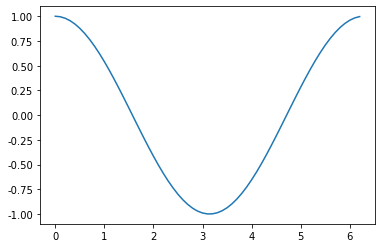

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# Coping with the problem of breaking the negative font in the graph.
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np

x = np.arange(0, 2*np.pi, 0.1)    # start, stop, step
y = np.cos(x)
# print(x)
plt.plot(x, y)
plt.show()

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

# Check the number of characters in the first review and find the center point to get the second half.
start = len(reviews[0]) // 2

# Take the back half from the center point and create a document to compare.
source = reviews[0][-start:]

# Cosine similarity is calculated on a count vector, so convert to vector.
# transform() always requires input in the form of a list or matrix, so make it a list and input it.
source_cv = cv.transform([source])

# Check the size of the matrix, since the document is one (1, 1000)
print('# 대상 특성 행렬의 크기:', source_cv.shape)

# Calculate the similarity between the transformed count vector and the existing values.
sim_result = cosine_similarity(source_cv, reviews_cv)

print('# 유사도 계산 행렬의 크기:', sim_result.shape)
print('# 유사도 계산결과를 역순으로 정렬:', sorted(sim_result[0], reverse=True)[:10])

# 대상 특성 행렬의 크기: (1, 1000)
# 유사도 계산 행렬의 크기: (1, 2000)
# 유사도 계산결과를 역순으로 정렬: [0.8367205630128807, 0.43817531290756406, 0.4080451370075411, 0.40727044884302327, 0.4060219836225451, 0.3999621981759778, 0.39965783997760135, 0.39566661804603703, 0.3945302295079114, 0.3911637170821695]


In [33]:
import numpy as np
print('# 가장 유사한 리뷰의 인덱스:', np.argmax(sim_result[0]))

# 가장 유사한 리뷰의 인덱스: 0


In [36]:
print('# 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10])

# 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1570  687  628  112 1712 1393  524 1740]


## Boost your performance with TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

reviews_tfidf = transformer.fit_transform(reviews_cv)

# Check that the shape of the TF-IDF matrix matches the shape of the count matrix.
print('# shape of tfidf matrix:', reviews_tfidf.shape)

# Print the first 20 values ​​in the count vector of the first review.
print('# 20 count score of the first review:', reviews_cv[0].toarray()[0][:20])

# Print the first 20 values ​​among the TF-IDF vectors of the first review.
print('# 20 tfidf score of the first review:', reviews_tfidf[0].toarray()[0][:20])

# shape of tfidf matrix: (2000, 1000)
# 20 count score of the first review: [6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]
# 20 tfidf score of the first review: [0.13556199 0.06700076 0.14998642 0.0772298  0.08608998 0.
 0.0609124  0.         0.03126552 0.         0.03242315 0.09567082
 0.06575035 0.06518293 0.03225625 0.         0.0345017  0.06863314
 0.10042383 0.16727495]


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(vocabulary=word_features)
reviews_tf = tf.fit_transform(reviews)

# Cosine similarity is calculated on a count vector, so convert to vector.
# transform() always requires input in the form of a list or matrix, so make it a list and input it.
source_tf = tf.transform([source])

# Calculate the similarity between the transformed count vector and the existing values.
sim_result_tf = cosine_similarity(source_tf, reviews_tf)

print('# 가장 유사한 리뷰의 인덱스:', np.argmax(sim_result_tf[0]))

# 가장 유사한 리뷰의 인덱스: 0


In [40]:
print(
    '# 카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:',
    (-sim_result[0]).argsort()[:10]
)
print(
    '# TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:',
    (-sim_result_tf[0]).argsort()[:10]
)

# 카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1570  687  628  112 1712 1393  524 1740]
# TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1393 1570  645  323 1143  628 1676 1391]
